In [1]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")
# Load the data
import pandas as pd

data = pd.read_csv("../data/A_NoiseAdded.csv", index_col=0)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Part (a)

We select the first 20 features and plot their distributions using seaborn's `kdeplot` which produces a smooth function

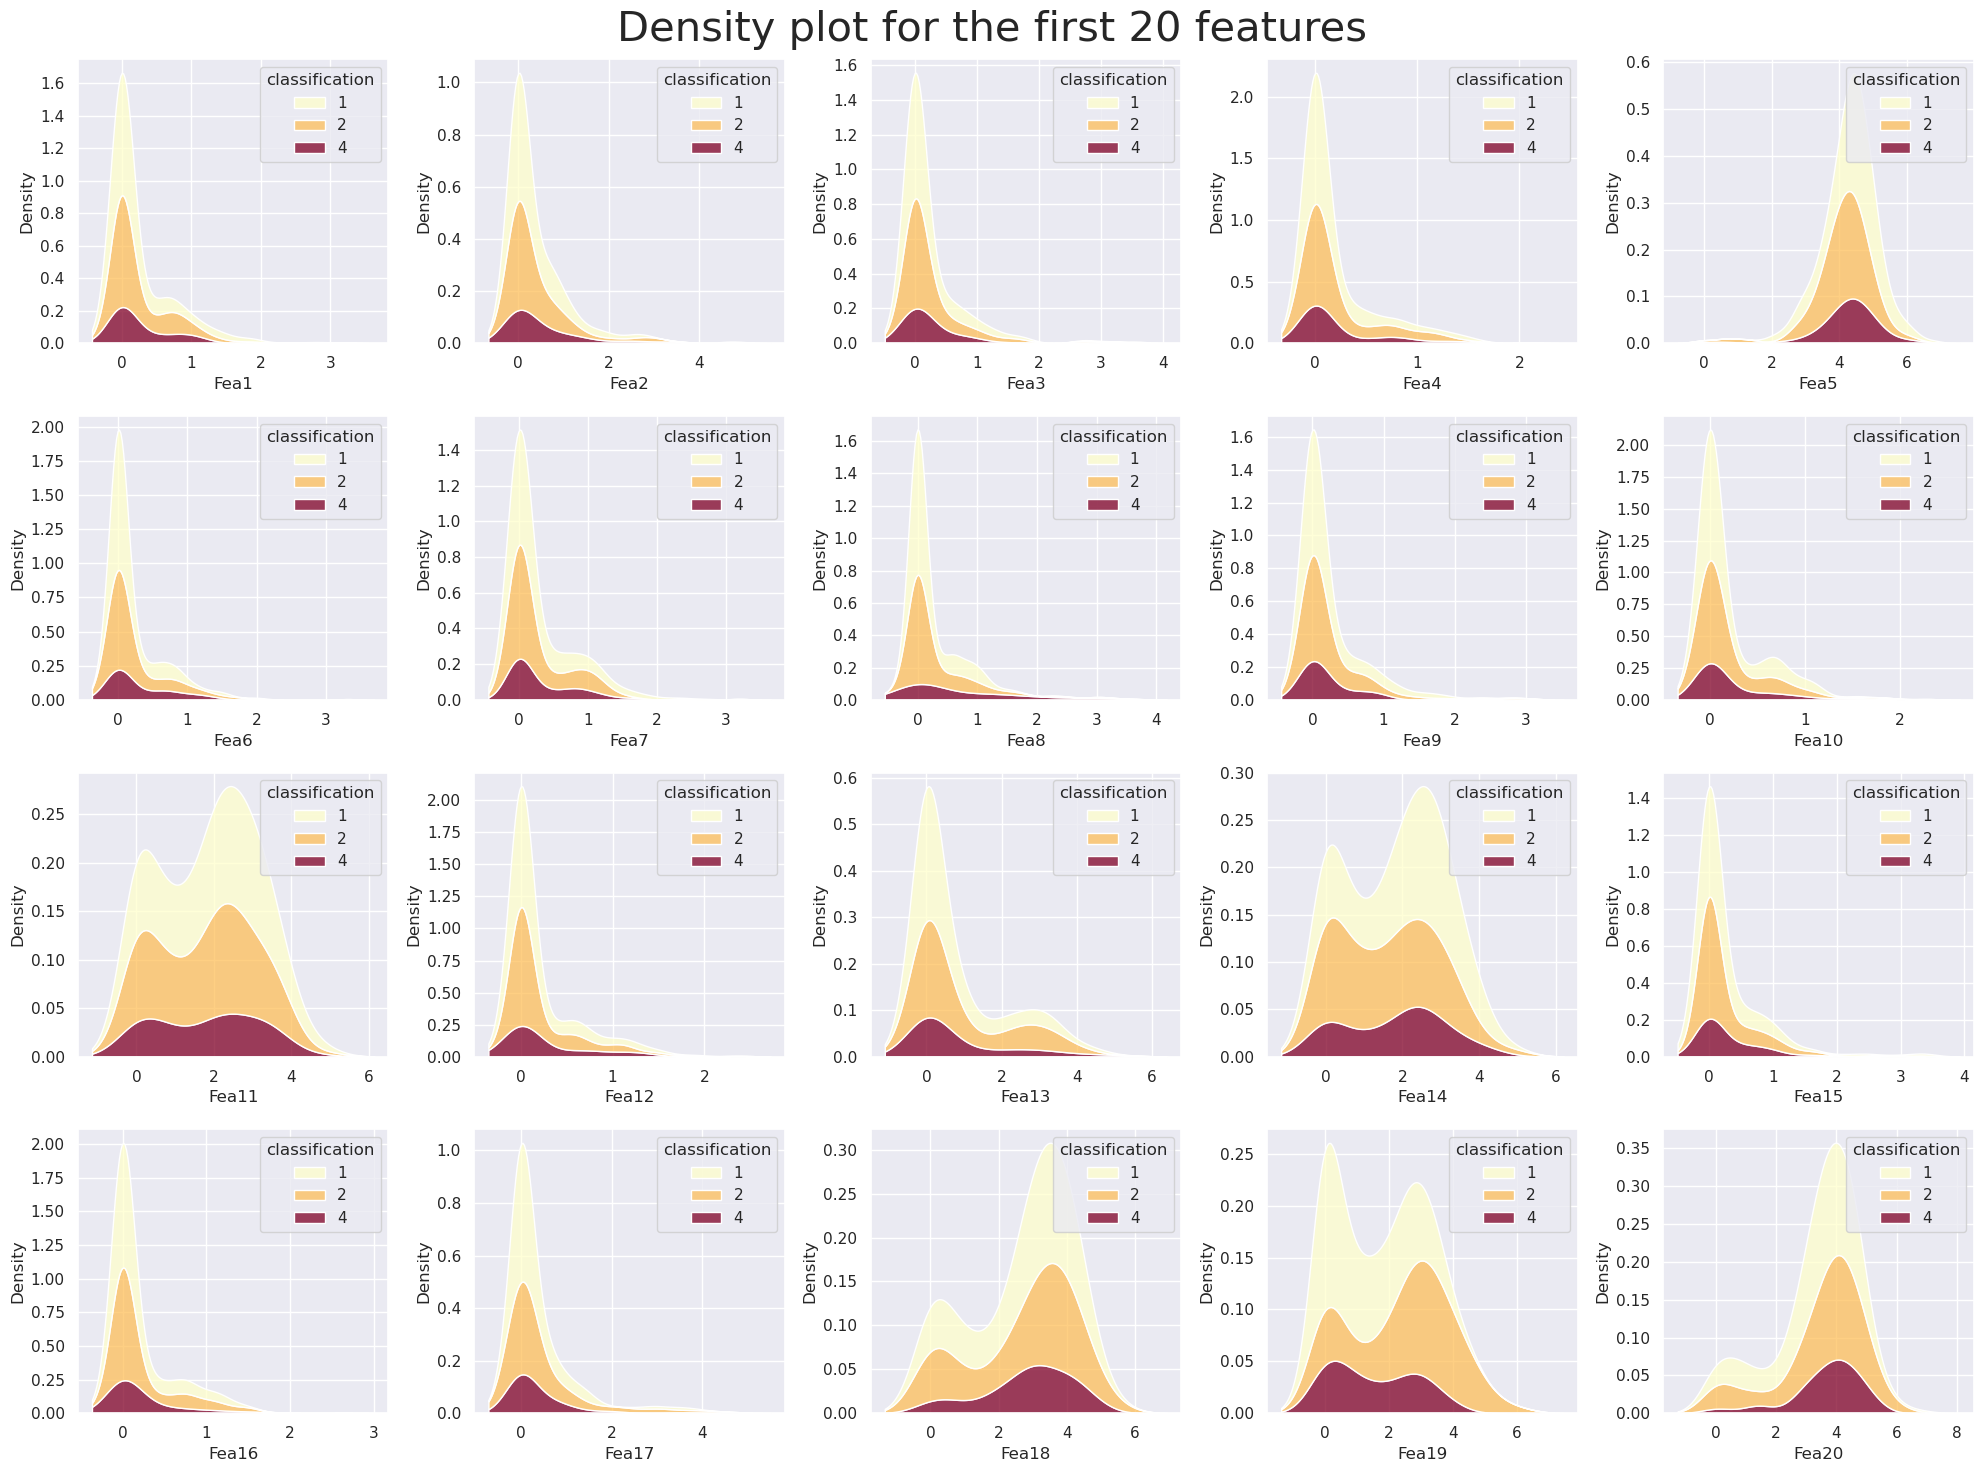

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(4, 5, figsize=(20, 15), dpi=100)
for i in range(20):
    sns.kdeplot(
        x=data.iloc[:, i],
        ax=ax[i // 5][i % 5],
        fill=True,
        hue=data.iloc[:, -1],
        multiple="stack",
        palette="YlOrRd",
    )

plt.suptitle("Density plot for the first 20 features", fontsize=30)
plt.tight_layout()

# Part (b)

We apply a standard scaler, because Principal Component Analysis behaves correctly only when data is scaled and centered.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("../data/A_NoiseAdded.csv", index_col=0)
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)
pca = PCA(2, random_state=42)
X_reduced = pca.fit_transform(X_rescaled)

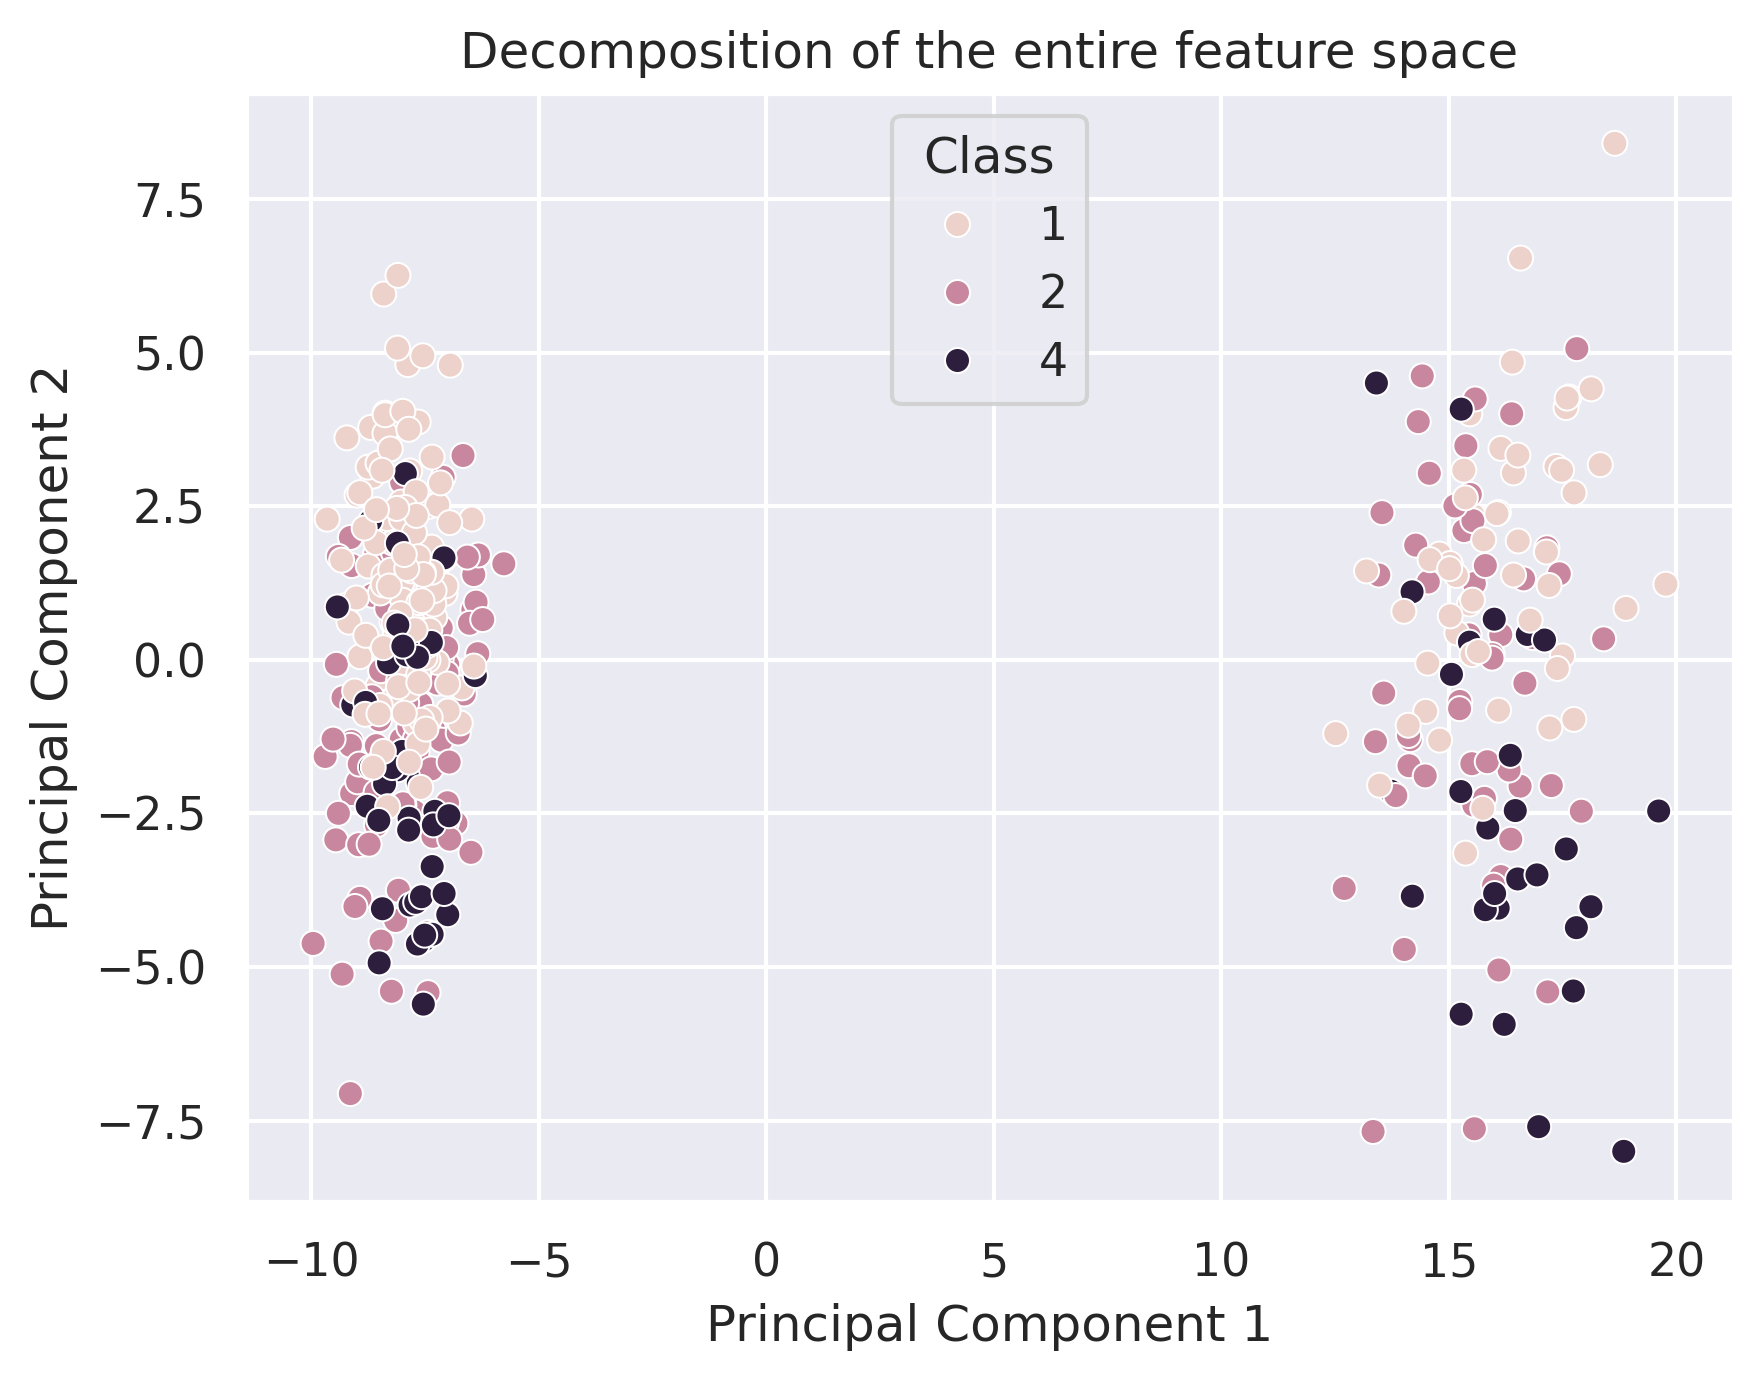

In [4]:
plt.figure(dpi=300)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decomposition of the entire feature space")
plt.legend(loc="upper center", title="Class")

In [5]:
var_ratio = pca.explained_variance_ratio_
print(
    f"The fraction of the explained variance for each component is {var_ratio[0] * 100:.2f}% and {var_ratio[1] * 100:.2f}% respectively"
)

The fraction of the explained variance for each component is 25.43% and 1.32% respectively


# Part (c)

We use a stratified split approach to preserve the class distributions.

In [6]:
from sklearn.model_selection import train_test_split

train_1, train_2 = train_test_split(
    X_rescaled, test_size=0.5, stratify=y, random_state=26
)

In [7]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(random_state=26)
kmeans_1.fit(train_1)
kmeans_2 = KMeans(random_state=26)
kmeans_2.fit(train_2)

KMeans(random_state=26)

Text(0.5, 1.0, 'Clustering with default parameters (partition 1)')

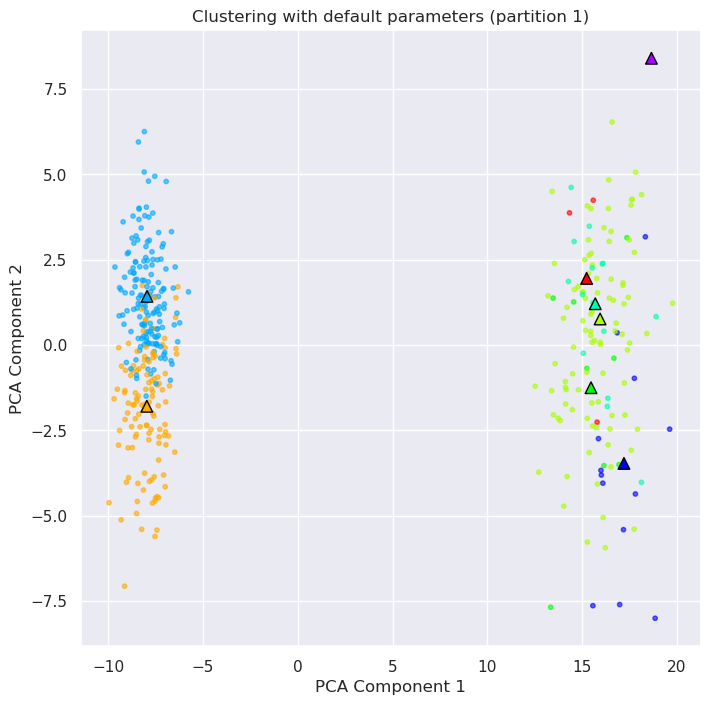

In [8]:
import sys

sys.path.append("..")
from src.plotting import visualize_clusters_no_hull

visualize_clusters_no_hull(X_rescaled, kmeans_1, pca, n_clusters=8, fit=False)
plt.title("Clustering with default parameters (partition 1)")

Text(0.5, 1.0, 'Clustering with default parameters (partition 2)')

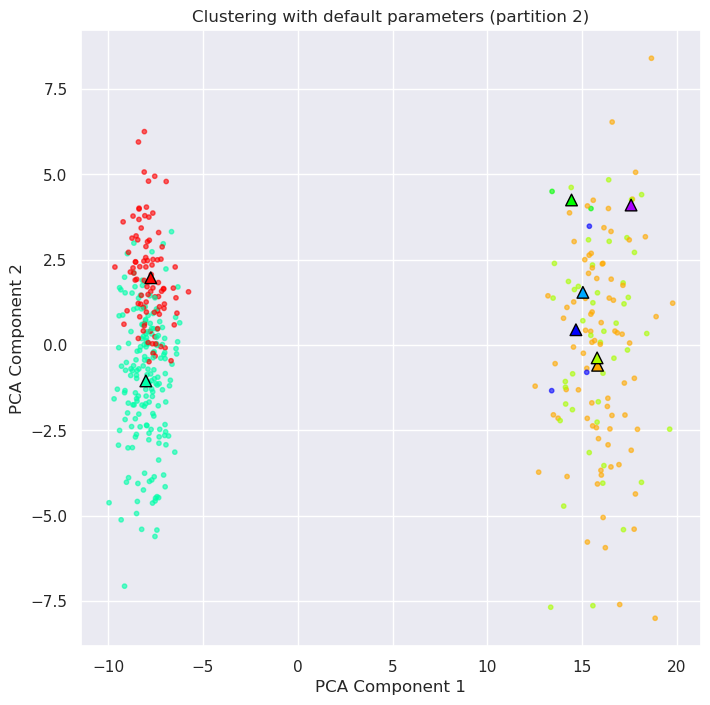

In [9]:
import sys

sys.path.append("..")
from src.plotting import visualize_clusters_no_hull

visualize_clusters_no_hull(X_rescaled, kmeans_2, pca, n_clusters=8, fit=False)
plt.title("Clustering with default parameters (partition 2)")

In [10]:
from sklearn.metrics.cluster import contingency_matrix

pred_1 = kmeans_1.predict(X_rescaled)
pred_2 = kmeans_2.predict(X_rescaled)

In [11]:
ctable = contingency_matrix(pred_1, pred_2)
ctable = pd.DataFrame(ctable)
ctable.index = [f"Cluster {i + 1} \n(partition 1)" for i in range(len(ctable))]
ctable.columns = [f"Cluster {i + 1} \n(partition 2)" for i in range(len(ctable))]
ctable.style.format(precision=3, thousands=".", decimal=",").format_index(
    str.upper, axis=1
).format_index(str.upper, axis=0).highlight_max(
    axis=1, props="color:white; font-weight:bold"
).set_properties(
    **{"text-align": "center"}
)

,CLUSTER 1 (PARTITION 2),CLUSTER 2 (PARTITION 2),CLUSTER 3 (PARTITION 2),CLUSTER 4 (PARTITION 2),CLUSTER 5 (PARTITION 2),CLUSTER 6 (PARTITION 2),CLUSTER 7 (PARTITION 2),CLUSTER 8 (PARTITION 2)
CLUSTER 1 (PARTITION 1),0,2,1,0,0,0,0,0
CLUSTER 2 (PARTITION 1),7,0,0,0,111,0,0,0
CLUSTER 3 (PARTITION 1),0,60,30,2,0,1,2,1
CLUSTER 4 (PARTITION 1),0,3,5,0,0,0,0,0
CLUSTER 5 (PARTITION 1),0,9,5,0,0,0,1,0
CLUSTER 6 (PARTITION 1),85,0,0,0,69,0,0,0
CLUSTER 7 (PARTITION 1),0,9,4,0,0,0,0,0
CLUSTER 8 (PARTITION 1),0,1,0,0,0,0,0,0


# Part (d)

In [12]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=2, random_state=26)
kmeans_1.fit(train_1)
kmeans_2 = KMeans(n_clusters=2, random_state=26)
kmeans_2.fit(train_2)
pred_1 = kmeans_1.predict(X_rescaled)
pred_2 = kmeans_2.predict(X_rescaled)

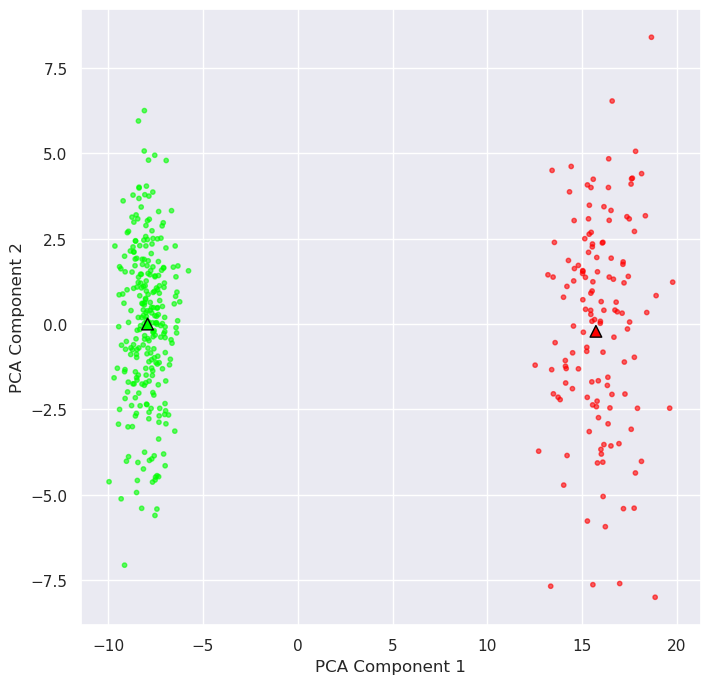

In [13]:
visualize_clusters_no_hull(X_rescaled, kmeans_2, pca, n_clusters=2, fit=False)

In [14]:
ctable = contingency_matrix(pred_1, pred_2)
ctable = pd.DataFrame(ctable)
ctable.index = [f"Cluster {i + 1} \n(partition 1)" for i in range(len(ctable))]
ctable.columns = [f"Cluster {i + 1} \n(partition 2)" for i in range(len(ctable))]
ctable.style.format(precision=3, thousands=".", decimal=",").format_index(
    str.upper, axis=1
).format_index(str.upper, axis=0).highlight_max(
    axis=1, props="color:white; font-weight:bold"
).set_properties(
    **{"text-align": "center"}
)

,CLUSTER 1 (PARTITION 2),CLUSTER 2 (PARTITION 2)
CLUSTER 1 (PARTITION 1),136,0
CLUSTER 2 (PARTITION 1),0,272


# Part (e)

Text(0.5, 1.0, 'Clustering when doing PCA before KMeans')

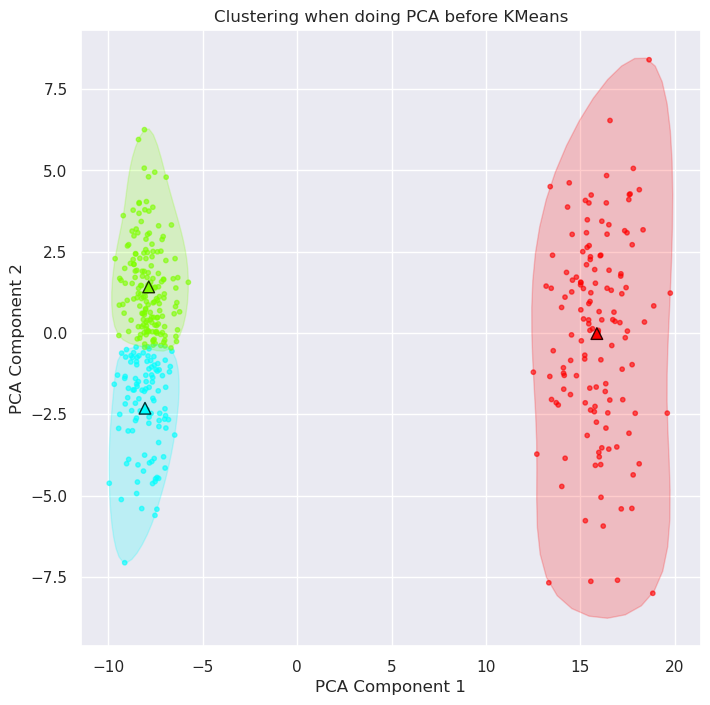

In [15]:
import sys

sys.path.append("..")
from src.plotting import visualize_clusters
from sklearn.preprocessing import FunctionTransformer

identity = FunctionTransformer(
    lambda x: x if not isinstance(x, pd.DataFrame) else x.values,
    inverse_func=lambda x: x,
)
kmeans = KMeans(n_clusters=3, random_state=0)
reduced_data = pd.DataFrame(X_reduced)
kmeans.fit(reduced_data)
visualize_clusters(reduced_data, kmeans, identity, n_clusters=3)
plt.title("Clustering when doing PCA before KMeans")

Text(0.5, 1.0, 'Clustering when doing KMeans before PCA')

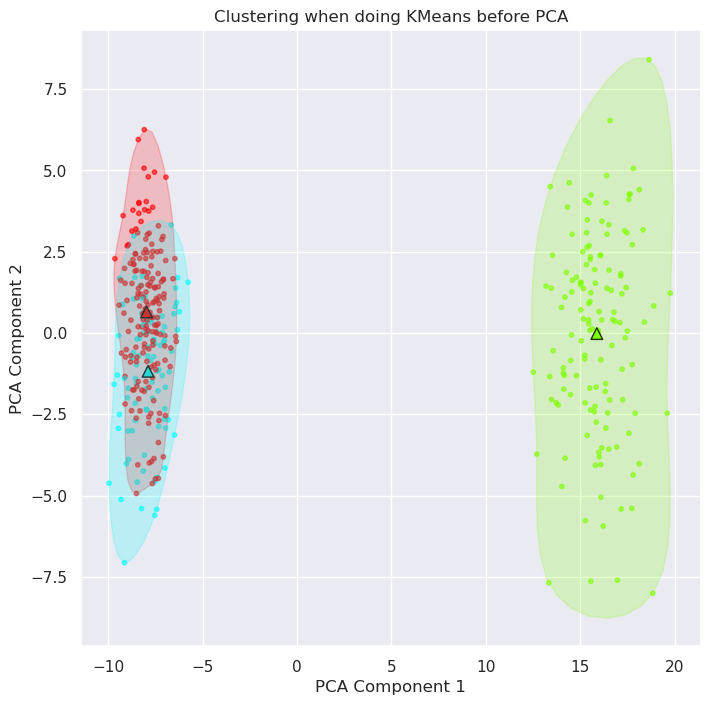

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_rescaled)
visualize_clusters(X_rescaled, kmeans, pca, n_clusters=3)
plt.title("Clustering when doing KMeans before PCA")